## Random Forest 
* Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make predictions.
* Random Forest uses a technique called bagging (bootstrap aggregating) to create the subsets of training data. Bagging involves randomly sampling the data with replacement, meaning that some samples may appear multiple times and some may not appear at all in a given subset. This helps to introduce randomness and diversity in the decision trees
* Once the decision trees are built, predictions are made by combining the outputs of all the trees. For classification tasks, the Random Forest uses a majority voting approach, where each tree "votes" for a class, and the class with the most votes is chosen as the final prediction. For regression tasks, the Random Forest takes the average of the predictions from all the trees.

## Random Forest Classifier
* In this notebook, i have taken mutliclassification problem. The main focus of this notebook is the implementation of random forest algorithm. I have not focused more on preprocessing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv("car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
# renaming columns
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns=col_names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


* class is a target variable.

In [6]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
for i in col_names:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


doors and persons are categorical variables, so no need to chage the datatype of these variables.

data is cleaned.

## Splitting Data

In [9]:
X=df.drop('class',axis=1)
Y=df['class']

In [10]:
# Label encoding for target variable
le=LabelEncoder()

Y=le.fit_transform(Y)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,train_size=0.7)

### Encoding
* In this dataset, order is an important for features,so i will go with ordinal encoding.

In [12]:
oe=OrdinalEncoder()
x_train=oe.fit_transform(x_train)
x_test=oe.transform(x_test)

Random forest is not a distance based algorithm, so we don't need to do feature scaling 

## Model building

In [13]:

rfc=RandomForestClassifier( n_estimators=100,
                           criterion='gini',
                           max_depth=None,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='sqrt',
                           bootstrap=True,
                          )

In [14]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
y_pred=rfc.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       118
           1       0.92      0.65      0.76        17
           2       0.99      1.00      0.99       361
           3       0.81      0.91      0.86        23

    accuracy                           0.97       519
   macro avg       0.92      0.88      0.89       519
weighted avg       0.97      0.97      0.97       519



<AxesSubplot:>

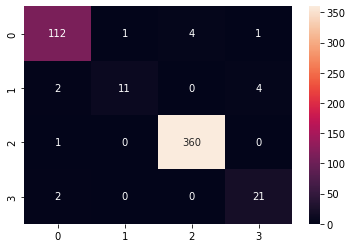

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

## Feature importance:
* Random forest is used for feature selection also. It has feature importance property which shows which all feature are dependant on the target variable.

In [19]:
rfc.feature_importances_

array([0.18950936, 0.17006087, 0.07045297, 0.21490397, 0.0809412 ,
       0.27413162])

In [27]:
pd.DataFrame({'features':df.drop('class',axis=1).columns,'score':rfc.feature_importances_})

,features,score
0,buying,0.189509
1,maint,0.170061
2,doors,0.070453
3,persons,0.214904
4,lug_boot,0.080941
5,safety,0.274132


Lower the score indicates that feature is not dependant on target and vise versa.

## Conclusion:
* Model is performing well with 96% accuracy.
* There is no need to tune the parameters of the model.